In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import json

In [2]:
with open('../../Simple_model_pack/fig2data.json', 'r') as json_file:
    dataplot = json.load(json_file)

In [3]:
def get_hist(c):
    bins = np.linspace(2, 250, 100)
    hist0 = np.histogram(c, bins=bins)[0]
    hist0 = hist0**2
    return hist0/hist0.sum()

def fun_size(c):
    return np.mean(c[c>1])

In [4]:
plt.rcParams.update({'font.size': 14})

In [10]:
# colors

c1 = '#d61465'
c2 = '#8fce00' 
c3 = '#feca2e'
c4 = '#6fa8dc'
c5 = '#750b74'


c_ref = '#424242'

In [16]:
dataset = 'pr_schooln'; nb_nodes = 242

1.8000000000000007
2.4000000000000012
2.9000000000000017
3.500000000000002
4.200000000000003


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


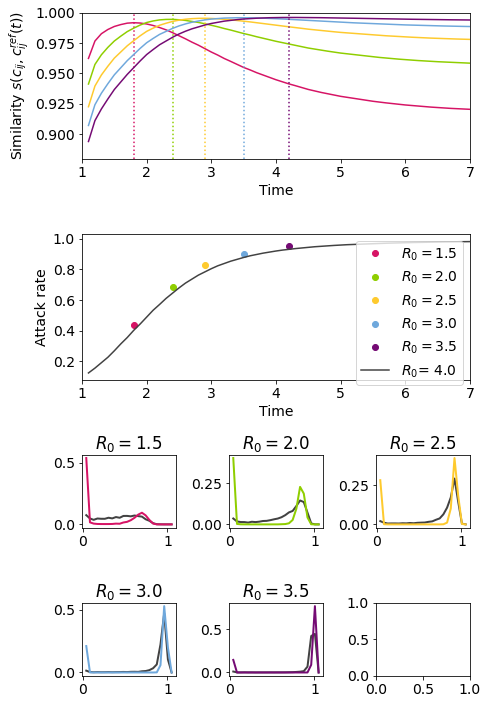

In [31]:
axd = plt.figure(figsize=(7,10),constrained_layout=True).subplot_mosaic(
    """
    AAA
    BBB
    cde
    fgh
    """,
    gridspec_kw={
         "height_ratios": [0.3, 0.3,0.15,0.15], # for distributions below
    },
)

axs = [axd['A'],axd['B'],]
axsd = [axd['c'],axd['d'], axd['e'], axd['f'], axd['g'], axd['h']]


model0 = 'SIR-4.0'
model1 = 'SIR-{}'
attack0 = 4.0
Npop = 242

time = dataplot['time'] # times considered for the plot
size_ref_t =  dataplot['reference_SIR-4.0']['dist_size(t)'] #sizes for each run at each time

size0 = np.array([ fun_size( np.array(c) ) for c in size_ref_t ])[:-1]/Npop

for indx, (attack,color) in enumerate( [(1.5,c1),(2.0,c2),(2.5,c3),(3.0,c4),(3.5,c5)]):
    
    key = model1.format(attack)
    label = '$R_0={}$'.format(attack)
    y= np.array(dataplot[key]['sim']) #similarity at each time between the reference Cij(t) and final Cij 
    itmin = y[1:].argmax() +1    
    
    dis_size1 = np.array(dataplot[key]['dist_size']) # final sizes for each run
    size1 = fun_size(dis_size1)/Npop
   
    # plotting similarity 
    axs[0].plot(time,y,color=color,label=label)
    axs[0].axvline(time[itmin],ls=':',color=color) 
    print(time[itmin])
    

    # plotting size 
    axs[1].plot(time[itmin],size1,color=color, marker='o',label=label, linestyle="None")
    #axs[1].axvline(time[itmin],ls=':',color=color) 
    
    # plotting histograms
    bins = np.linspace(0, 1.05, 25)
    hist0, xh = np.histogram(np.array(size_ref_t[itmin])/nb_nodes, bins=bins)
    hist1,xh = np.histogram(np.array(dis_size1)/nb_nodes, bins=bins)

    
    hist0 = hist0/hist0.sum()
    hist1 = hist1/hist1.sum()
    
    axsd[indx].plot(bins[1:],hist0, color=c_ref, linewidth=2)
    axsd[indx].plot(bins[1:],hist1, color=color, linewidth=2)
    
    axsd[indx].set_title(label)


axs[1].plot(time,size0,c_ref,  label='$R_0$= {}'.format(attack0))
    
axs[1].legend(numpoints=1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Similarity $ s( c_{ij},  c_{ij}^{ref}(t) )$')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Attack rate')
axs[0].set_xlim(1,7)
axs[1].set_xlim(1,7)
axs[0].set_ylim(0.88,1.0)



plt.tight_layout()

plt.savefig('similarity_time.pdf')